<a href="https://colab.research.google.com/github/ashishsaranshakya/learning_data_analytics/blob/main/Environment_Social_And_Governance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment, Social And Governance Data Analysis



In [151]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Importing data from https://www.kaggle.com/datasets/tunguz/environment-social-and-governance-data/ related to the information on 17 key sustainability themes spanning environmental, social, and governance categories.

Dataset has been compiled from World Bank's ESG Data Draft

In [ ]:
base_uri='drive/MyDrive/Datasets/esg data/'
esg_data_df = pd.read_csv(base_uri+'ESGData.csv')
esg_data_df.head()

In [ ]:
esg_country_series_df = pd.read_csv(base_uri+'ESGCountry-Series.csv')
esg_country_series_df.head()

In [ ]:
esg_country_df = pd.read_csv(base_uri+'ESGCountry.csv')
esg_country_df.head()

In [ ]:
esg_series_time_df = pd.read_csv(base_uri+'ESGSeries-Time.csv')
esg_series_time_df.head()

In [ ]:
esg_series_df = pd.read_csv(base_uri+'ESGSeries.csv')
esg_series_df.head()
esg_series_df[esg_series_df['Unit of measure'].notnull()]

Extracting data on India, South Asia and the World for comparison

In [ ]:
india_esg_df = esg_data_df[esg_data_df['Country Name']=='India']
india_esg_df.head()

In [ ]:
south_asia_esg_df = esg_data_df[esg_data_df['Country Name']=='South Asia']
south_asia_esg_df.head()

In [ ]:
world_esg_df = esg_data_df[esg_data_df['Country Name']=='World']
world_esg_df.head()

In [160]:
def format_data(df):
  df_years = df.index[4:-1]
  df_values = df[4:-1]
  df_cleaned_years = [int(year) for year in df_years if str(year).isdigit()]
  df_cleaned_values = pd.to_numeric(df_values, errors='coerce')
  return (df_cleaned_years,df_cleaned_values)

In [270]:
def plot_series(series,ax,dash=None,col=None,label=None):
  series_cleaned_years, series_cleaned_values = format_data(series)
  return ax.plot(series_cleaned_years, series_cleaned_values,dash,label=label,color=col)

In [271]:
def plot_indicator(df,indicator,axes,dash='-',label=None):
  if label is None:
    label=indicator
  series=df[df['Indicator Code']==indicator].squeeze(axis=0)
  return plot_series(series,axes,dash,label=label)

In [272]:
def plot_list_indicator(raw_df, primary_indicators, secondary_indicators, country_name, indicator_dict, title = 'Environment, Social and Governance Data'):
  plt.figure(figsize=(10, 8))
  plt.title(title)
  df=raw_df[raw_df['Country Name']==country_name]
  lines = None
  for indicator in primary_indicators:
    y = plot_indicator(df,indicator,plt,'-',label=indicator_dict.get(indicator,indicator))
    if(lines is None):
      lines=y
    else:
      lines=lines+y

  ax = plt.twinx()
  for indicator in secondary_indicators:
    y = plot_indicator(df,indicator,ax,'--',label=indicator_dict.get(indicator,indicator))
    lines=lines+y

  set_legend(lines)

In [164]:
def set_legend(lines):
  labs = [l.get_label() for l in lines]
  plt.legend(lines, labs, bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

In [214]:
def extract_indicators(indicator_name_list):
  indicator_code_list=[]
  temp=esg_data_df[['Indicator Code','Indicator Name']].set_index('Indicator Name')
  indicator_dict=dict();
  for code in indicator_name_list:
    indicator_dict[temp.squeeze(axis=1)[code][0]]=code
    indicator_code_list.append(temp.squeeze(axis=1)[code][0])
  return (indicator_code_list, indicator_dict)

In [ ]:
list(esg_data_df['Indicator Name'].unique())

# How are CO2 emissions related to energy requirements and production in India and its relation to regulatory quality

### Indicators considered

- CO2 emissions (metric tons per capita)
- Access to electricity (% of population)
- Fossil fuel energy consumption (% of total)
- Electricity production from coal sources (% of total)
- Energy imports, net (% of energy use)
- Energy intensity level of primary energy (MJ/$2011 PPP GDP)
- Energy use (kg of oil equivalent per capita)
- Regulatory Quality: Estimate
- Renewable electricity output (% of total electricity output)
- Renewable energy consumption (% of total final energy consumption)

In [265]:
indicator_name_list=['CO2 emissions (metric tons per capita)',
                     'Regulatory Quality: Estimate',
                     'Access to electricity (% of population)',
                     'Fossil fuel energy consumption (% of total)',
                     'Electricity production from coal sources (% of total)',
                     'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
                     'Renewable electricity output (% of total electricity output)',
                     'Renewable energy consumption (% of total final energy consumption)']
indicator_code_list, indicator_dict = extract_indicators(indicator_name_list)
indicator_dict

{'EN.ATM.CO2E.PC': 'CO2 emissions (metric tons per capita)',
 'RQ.EST': 'Regulatory Quality: Estimate',
 'EG.ELC.ACCS.ZS': 'Access to electricity (% of population)',
 'EG.USE.COMM.FO.ZS': 'Fossil fuel energy consumption (% of total)',
 'EG.ELC.COAL.ZS': 'Electricity production from coal sources (% of total)',
 'EG.EGY.PRIM.PP.KD': 'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
 'EG.ELC.RNEW.ZS': 'Renewable electricity output (% of total electricity output)',
 'EG.FEC.RNEW.ZS': 'Renewable energy consumption (% of total final energy consumption)'}

### Regulatory Quality and CO2 emission

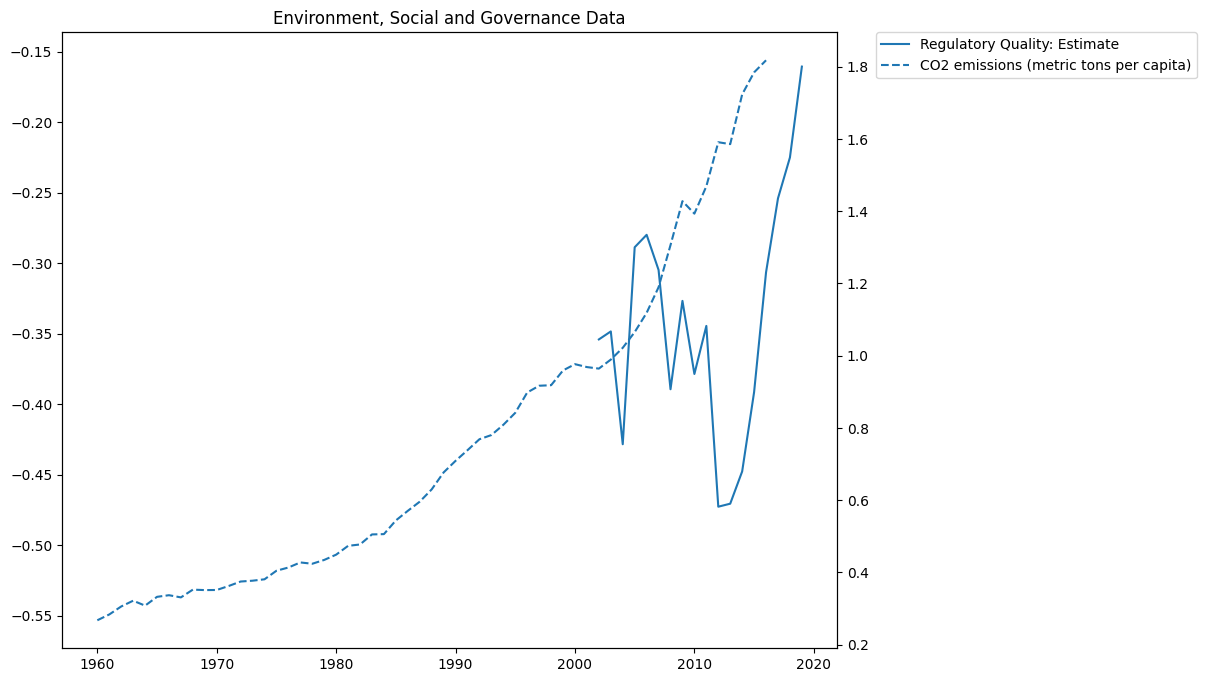

In [204]:
plot_list_indicator(esg_data_df,[indicator_code_list[1],],[indicator_code_list[0]],'India',indicator_dict)

**Interpretation:** The graph above suggests that there is some relation between emission of CO2 and regulatory quality, CO2 emission increases with increase in regulatory quality. This may be due to other factor that are independent of the regulatory quality like resources available. This may also suggest that stringent regulations may not allow alternatives to be economical.

### Access to electricity and CO2 emission

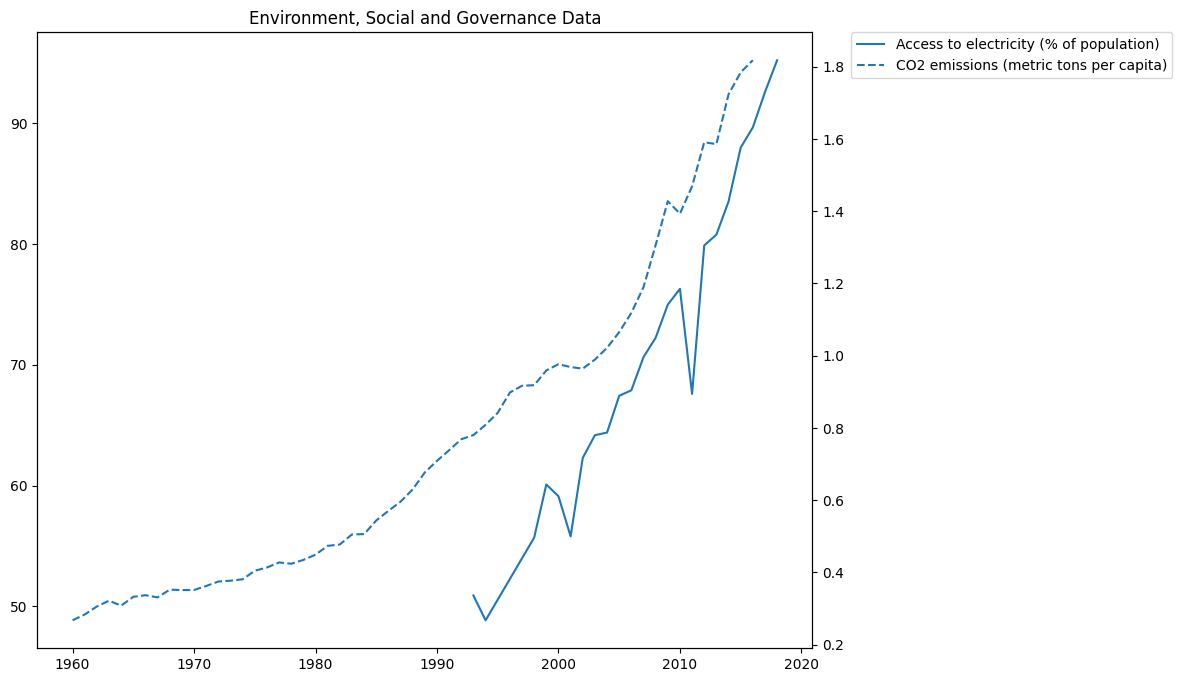

In [205]:
plot_list_indicator(esg_data_df,[indicator_code_list[2],],[indicator_code_list[0]],'India',indicator_dict)

**Interpretation:** The graph above suggests that there is positive correlation between emission of CO2 and access to electricity. This can be attributed to the need of energy that is required to supply electricity to the populace. The electricity being produced by coal-based power plants would be the main contributer to the CO2 emission.

This factor although significant would become less contributing as the graph suggests that access to electricity is reaching 100% and so the need for more power to supply the growing population that has access to electricity.

### Fossil fuel energy consumption and CO2 emission

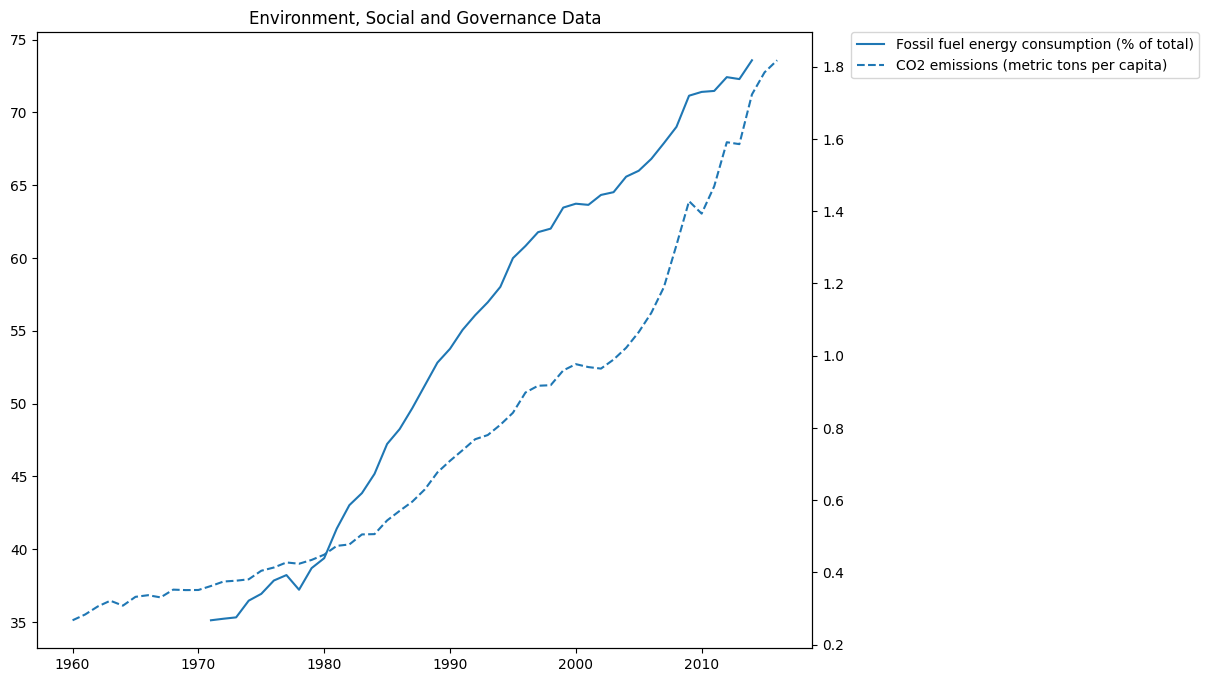

In [206]:
plot_list_indicator(esg_data_df,[indicator_code_list[3],],[indicator_code_list[0]],'India',indicator_dict)

**Interpretation:** The graph above suggests that there is positive correlation between emission of CO2 and fossil fuel energy consumption. This can be attributed to the CO2 produced during burning of fossil fuels. The electricity being produced by coal-based power plants would be the main contributer to the CO2 emission as coal is the most CO2 producing fossil fuel with an average of 1.94 kg  CO2 produced per kilogram of Bituminous coal burned.

**Source:** https://www.eia.gov/environment/emissions/co2_vol_mass.php

### Electricity production from coal sources and Renewable electricity output and CO2 emission

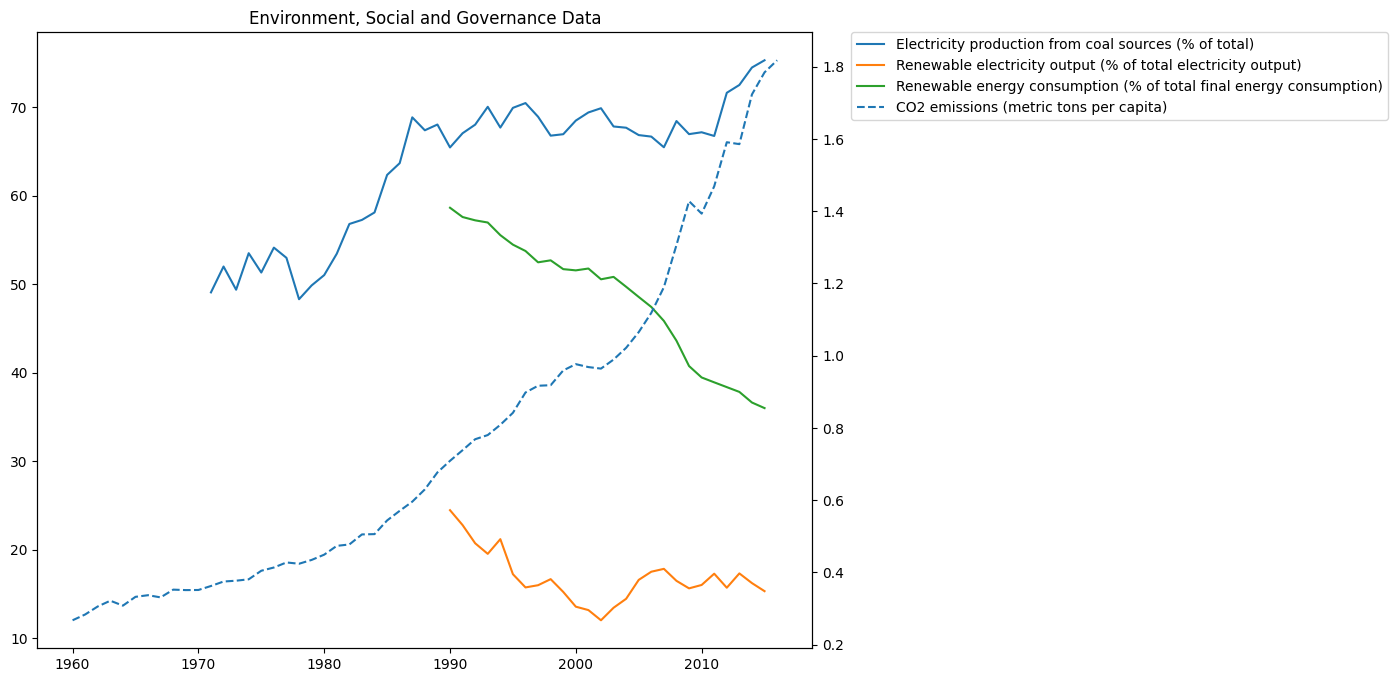

In [273]:
plot_list_indicator(esg_data_df,[indicator_code_list[4],indicator_code_list[6],indicator_code_list[7]],[indicator_code_list[0]],'India',indicator_dict)

**Interpretation:** The graph above suggests that there is some relation between emission of CO2 and electricity production from coal sources. This can be attributed to the CO2 produced during burning of coal. The electricity being produced by coal-based power plants would be the contributer to the CO2 emission.

The graph shows a clear decline in both use of and production of electricity from renewable sources. It also shows that as output of renewable energy decreases CO2 emission tend to rise as seen in the 2000s when CO2 emission increase exponentially.

The stagnation in the 1980s is attributed to the the push for renewables like hydropower which had a major boost in installed capacity in the specified time frame. Another minor factor may be the maturation of nuclear energy and the establishment of the first nuclear power plant in 1969, although the overall installed capacity has remained significantly less than coal.

**Source:** https://cea.nic.in/wp-content/uploads/pdm/2020/12/growth_2020.pdf

### Energy intensity level of primary energy and CO2 emission

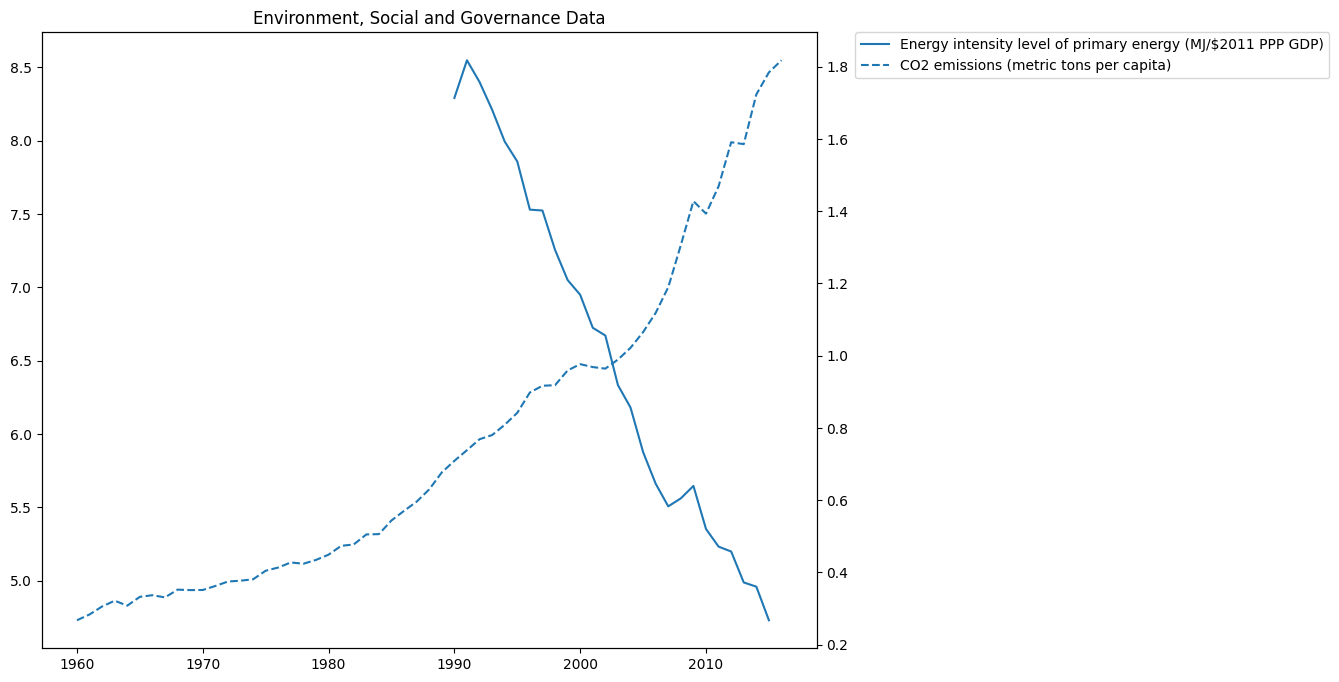

In [209]:
plot_list_indicator(esg_data_df,[indicator_code_list[5],],[indicator_code_list[0]],'India',indicator_dict)

**Interpretation:** The graph above suggests that there is negative correlation between emission of CO2 and energy intensity level of primary energy. This suggests that India has been able to decouple economic growth from CO2 emission although the CO2 emission is increasing the economic growth is significantly higher for unit CO2 produced.

This may be attributed to the higher percentage use by the industrial sector as compared to commercial or household use. Energy efficiency in industries resulted in emission reduction of 60 MtCO2.

**Source:** https://iaee2021online.org/download/contribution/fullpaper/525/525_fullpaper_20210608_033820.pdf

#### **Conclusion:** The data presented in the graphs and the specified sources suggest that the increase in CO2 emission is dependent on my factors. The major factor in electricity production is coal-based power plant which are in abundance in India and produce significant CO2 and account for greater than 35% overall CO2 emission.

#### The rise in CO2 emissions can be attributed to the lack of viable alternative energy sources. Renewable energy sources, which had peaked before the available data in the dataset, are observed to be declining.

#### Although the energy intensity has been decreasing in India for a long time the need for renewables is so that there is decrease in CO2 emission and not just efficient use of energy which is produced from fossil fuels.

**Sources:**

https://www.ceew.in/publications/state-and-sector-wise-greenhouse-gases-and-carbon-emissions-india
https://www.statista.com/statistics/955980/india-distribution-of-ghg-emissions-by-sector/

### What factors have led to the growth of literacy rate in India and the effects thereof

Dataset for literacy:
-  <a href='https://www.macrotrends.net/countries/IND/india/literacy-rate'>India Literacy Rate 1981-2023</a>. www.macrotrends.net. Retrieved 2023-11-05.
- https://datatopics.worldbank.org/world-development-indicators/themes/people.html

In [ ]:
indicator_name_list = [ 'School enrollment, primary (% gross)',
                        'School enrollment, primary and secondary (gross), gender parity index (GPI)',
                        'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                        'Proportion of seats held by women in national parliaments (%)',]
indicator_code_list, indicator_dict = extract_indicators(indicator_name_list)
indicator_dict

In [ ]:
literacy_df = pd.read_csv(base_uri+'external/literacy_rate_world_bank.csv', skiprows=4)
literacy_indicator = 'Literacy rate, youth total (% of people ages 15-24)'
literacy_df

In [293]:
#plot_list_indicator(literacy_df,['SE.ADT.1524.LT.ZS'],[],'India',{'SE.ADT.1524.LT.ZS': literacy_indicator})
plt.figure(figsize=(10, 8))
df=literacy_df[literacy_df['Country Name']=='India']
series=df[df['Indicator Code']=='SE.ADT.1524.LT.ZS'].squeeze(axis=0)
#y = plot_series(series,plt,'o',label=literacy_indicator)


series_cleaned_years, series_cleaned_values = format_data(series)
print(series_cleaned_values)
#y = plt.plot(series_cleaned_years, series_cleaned_values,label=literacy_indicator,  linestyle='-', marker='o')

#set_legend(y)

1960          NaN
1961          NaN
1962          NaN
1963          NaN
1964          NaN
          ...    
2018          NaN
2019          NaN
2020    94.599998
2021          NaN
2022    96.535873
Name: 109, Length: 63, dtype: float64


<Figure size 1000x800 with 0 Axes>

In [ ]:
for i in range(len(indicator_code_list)):
  plot_list_indicator(esg_data_df,[indicator_code_list[i]],[],'India',indicator_dict)